# Обучим модели для фиксированного n

Загрузим датасет

In [62]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/distance_graph_dataset_2.csv')

In [63]:
df.sample(10)

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
3480,250,0,90,85,5,197,6
8174,300,0,105,87,5,209,6
8364,300,0,129,112,5,251,7
4228,200,0,76,72,5,110,6
9525,300,1,149,113,4,256,5
3191,100,1,43,34,4,49,5
6797,25,0,11,8,3,6,4
6483,150,1,66,50,3,121,5
4813,200,0,64,60,5,191,7
8858,100,0,42,40,6,90,6


Отберем только данные, где `n = 25`

In [64]:
df = df[df['n'] == 25]

In [65]:
df.describe()

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
count,928.0,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,25.0,0.488147,12.131466,10.332974,3.473060,14.678879,4.080819
std,0.0,0.500129,1.985373,1.909526,0.725054,5.526664,0.697459
min,25.0,0.000000,8.000000,7.000000,1.000000,1.000000,2.000000
25%,25.0,0.000000,11.000000,9.000000,3.000000,10.000000,4.000000
50%,25.0,0.000000,12.000000,10.000000,3.000000,14.000000,4.000000
75%,25.0,1.000000,13.000000,11.000000,4.000000,19.000000,4.250000
max,25.0,1.000000,21.000000,18.000000,6.000000,25.000000,7.000000


In [66]:
df = df.drop('n', axis=1)

In [67]:
df.sample(10)

,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
6133,0,13,13,3,11,3
9403,0,9,7,3,14,5
4217,0,9,9,3,6,4
9128,1,10,9,4,16,4
9264,1,13,9,3,9,4
8415,1,13,10,4,8,4
7584,0,12,10,5,23,6
9102,0,14,8,3,16,4
2309,0,9,8,5,18,5
7771,1,13,10,4,22,4


Посмотрим на распределение признаков:

In [68]:
counts = df['distribution'].value_counts()
props = df['distribution'].value_counts(normalize=True)
print(counts, props)

distribution
0    475
1    453
Name: count, dtype: int64 distribution
0    0.511853
1    0.488147
Name: proportion, dtype: float64


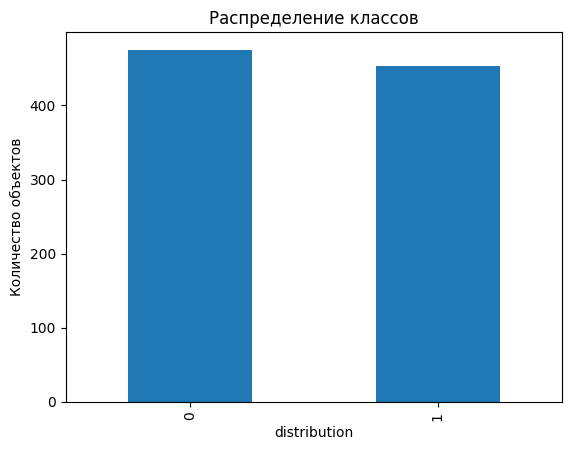

In [69]:
import matplotlib.pyplot as plt

counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('distribution')
plt.ylabel('Количество объектов')
plt.show()

Распределение примерно одинаковое

In [70]:
RANDOM_STATE = 42
N = 25
target = 'distribution'

**Функции для вычисления мощности и ошибки первого рода**

In [71]:
from sklearn.metrics import confusion_matrix

def power_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    power = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return power

def type1_err_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    type1_error = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    return type1_error

## Обучим логистическую регрессию

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [74]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE))
])

In [75]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [76]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)
power     = power_score(y_test, y_pred)
type1_err = type1_err_score(y_test, y_pred)

In [77]:
print(f'Accuracy:    {accuracy:.4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1-score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')
print(f'Power:       {power:.4f}')
print(f'Type 1 Error {type1_err:.4f}')

Accuracy:    0.6613
Precision:   0.7778
Recall:      0.5833
F1-score:    0.6667
ROC AUC:     0.7666
Power:       0.5833
Type 1 Error 0.2308


Важность признаков

In [78]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipeline.named_steps['classifier'].coef_[0],
    'Abs_Coefficient': np.abs(pipeline.named_steps['classifier'].coef_[0])
})
feature_importance_sorted = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print(feature_importance_sorted)

                    Feature  Coefficient  Abs_Coefficient
0          chromatic_number     0.666639         0.666639
4     min_clique_cover_size    -0.595314         0.595314
2  max_independent_set_size    -0.260817         0.260817
1             clique_number     0.180964         0.180964
3         domination_number    -0.070950         0.070950


Попробуем добавить новые признаки

In [79]:
import pandas as pd
import numpy as np

df_new = pd.read_csv('../data/distance_graph_dataset_2.csv')

df_new = df_new[df_new['n'] == 25]

df_new['chromatic_to_clique_ratio']           = df_new['chromatic_number'] / df_new['clique_number']
df_new['chromatic_to_max_independent_ratio']  = df_new['chromatic_number'] / df_new['max_independent_set_size']
df_new['clique_to_max_independent_ratio']     = df_new['clique_number']    / df_new['max_independent_set_size']
df_new['domination_to_clique_ratio']          = df_new['domination_number'] / df_new['clique_number']
df_new['min_clique_cover_to_chromatic_ratio'] = df_new['min_clique_cover_size'] / df_new['chromatic_number']

df_new['chromatic_minus_clique']              = df_new['chromatic_number'] - df_new['clique_number']
df_new['min_clique_cover_minus_chromatic']    = df_new['min_clique_cover_size'] - df_new['chromatic_number']
df_new['max_independent_plus_clique']         = df_new['max_independent_set_size'] + df_new['clique_number']

df_new['chromatic_number_sq']                 = df_new['chromatic_number'] ** 2
df_new['clique_number_sq']                    = df_new['clique_number'] ** 2
df_new['max_independent_set_size_sq']         = df_new['max_independent_set_size'] ** 2
df_new['chromatic_clique_product']            = df_new['chromatic_number'] * df_new['clique_number']

df_new['chromatic_number_log']                = np.log1p(df_new['chromatic_number'])
df_new['clique_number_sqrt']                  = np.sqrt(df_new['clique_number'])

Добавим ElasticNet для подбора параметров:

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
from sklearn.model_selection import train_test_split

X = df_new.drop(target, axis=1)
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [82]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=5000,
        random_state=RANDOM_STATE
    ))
])

param_grid = {
    'classifier__C':      [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'classifier__l1_ratio': [0.2, 0.5, 0.7, 0.9]
}

In [83]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=5000,
                                                           penalty='elasticnet',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'classifier__l1_ratio': [0.2, 0.5, 0.7, 0.9]},
             scoring='recall', verbose=1)

In [84]:
best_C  = grid.best_params_['classifier__C']
best_l1 = grid.best_params_['classifier__l1_ratio']
print("Лучшие параметры:", grid.best_params_)
print("Лучший (CV):", grid.best_score_)

Лучшие параметры: {'classifier__C': 10, 'classifier__l1_ratio': 0.2}
Лучший (CV): 0.6579710144927536


In [85]:
best_model = grid.best_estimator_
y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [86]:
print(f'Accuracy:    {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:   {precision_score(y_test, y_pred):.4f}')
print(f'Recall:      {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:    {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:     {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:       {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error {type1_err_score(y_test, y_pred):.4f}')

Accuracy:    0.6559
Precision:   0.7619
Recall:      0.5926
F1-score:    0.6667
ROC AUC:     0.7641
Power:       0.5926
Type 1 Error 0.2564


Важность признаков

In [87]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.named_steps['classifier'].coef_[0],
    'Abs_Coefficient': np.abs(best_model.named_steps['classifier'].coef_[0])
})
feature_importance_sorted = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print(feature_importance_sorted)

                                Feature  Coefficient  Abs_Coefficient
9            domination_to_clique_ratio    -1.209534         1.209534
4                     domination_number     1.044351         1.044351
5                 min_clique_cover_size    -0.994930         0.994930
18                 chromatic_number_log     0.933870         0.933870
16          max_independent_set_size_sq    -0.873818         0.873818
10  min_clique_cover_to_chromatic_ratio     0.790692         0.790692
7    chromatic_to_max_independent_ratio    -0.787431         0.787431
8       clique_to_max_independent_ratio     0.647225         0.647225
14                  chromatic_number_sq    -0.509075         0.509075
3              max_independent_set_size     0.470084         0.470084
17             chromatic_clique_product     0.423248         0.423248
11               chromatic_minus_clique     0.362500         0.362500
12     min_clique_cover_minus_chromatic    -0.298748         0.298748
19                  

**Вывод:**\
Новые признаки и подбор гиперпараметров не дали особого прироста качества.\
Наилучшие результаты:
* мощность: `0.59`
* ошибка первого рода: `0.23`

## Обучим SVM с kernel='linear'

In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [89]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [90]:
pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True, random_state=RANDOM_STATE)
)

In [91]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [92]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [93]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      0.6559
Precision:     0.7821
Recall:        0.5648
F1-score:      0.6559
ROC AUC:       0.7683
Power:         0.5648
Type 1 Error:  0.2179


Важность признаков

In [95]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipeline.named_steps['svc'].coef_[0],
    'Abs_Coefficient': np.abs(pipeline.named_steps['svc'].coef_[0])
})
feature_importance_sorted = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print(feature_importance_sorted)

                    Feature  Coefficient  Abs_Coefficient
0          chromatic_number     0.611504         0.611504
4     min_clique_cover_size    -0.408737         0.408737
2  max_independent_set_size    -0.254370         0.254370
1             clique_number     0.232528         0.232528
3         domination_number    -0.062246         0.062246


**Вывод:**\
Мощность улучшить не удалось, но незначительно уменьшилась ошибка первого рода.\
Наилучшие результаты:
* мощность: `0.56`
* ошибка первого рода: `0.22`

**Запустим RandomizedSearchCV**

In [96]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [97]:
pipeline = make_pipeline(
    StandardScaler(),
    SVC(probability=True, random_state=RANDOM_STATE)
)

In [98]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'svc__C':      loguniform(1e-3, 1e3),
    'svc__kernel': ['linear','rbf'],
    'svc__gamma':  loguniform(1e-4, 1e1)
}

rnd = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=2
)

rnd.fit(X_train, y_train)

print("Best params:", rnd.best_params_)
print("Best CV:",   rnd.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=47.6591180868084, svc__gamma=0.09643857615941427, svc__kernel=rbf; total time=   0.2s
[CV] END svc__C=47.6591180868084, svc__gamma=0.09643857615941427, svc__kernel=rbf; total time=   0.2s
[CV] END svc__C=47.6591180868084, svc__gamma=0.09643857615941427, svc__kernel=rbf; total time=   0.2s
[CV] END svc__C=0.008629132190071854, svc__gamma=0.00019517224641449495, svc__kernel=rbf; total time=   0.2

In [100]:
best = rnd.best_estimator_

y_pred = best.predict(X_test)
y_proba = best.predict_proba(X_test)[:, 1]

In [101]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      0.6720
Precision:     0.7582
Recall:        0.6389
F1-score:      0.6935
ROC AUC:       0.7313
Power:         0.6389
Type 1 Error:  0.2821


Важность признаков

In [102]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best, X, y, n_repeats=10, random_state=42)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance_mean': result.importances_mean,
    'Importance_std': result.importances_std
})

feature_importance_sorted = feature_importance.sort_values('Importance_mean', ascending=False)
print(feature_importance_sorted)

                    Feature  Importance_mean  Importance_std
0          chromatic_number         0.074353        0.011616
4     min_clique_cover_size         0.057651        0.007037
2  max_independent_set_size         0.040086        0.007096
1             clique_number         0.024677        0.009775
3         domination_number         0.005172        0.007753


**Вывод:**\
Мощность стала больше, но и ошибка стала больше:
* мощность: `0.64`
* ошибка первого рода: `0.28`

## RandomForest

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [104]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [105]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE))
])

In [106]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [107]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [108]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      0.6774
Precision:     0.7449
Recall:        0.6759
F1-score:      0.7087
ROC AUC:       0.7068
Power:         0.6759
Type 1 Error:  0.3205


Важность признаков

In [110]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pipeline.named_steps['rf'].feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

                    Feature  Importance
3         domination_number    0.377601
0          chromatic_number    0.238375
1             clique_number    0.182349
4     min_clique_cover_size    0.122343
2  max_independent_set_size    0.079332


**Вывод:**\
`RandomForest` показал неплохую мощность, но большую ошибку, видимо, для данной задачи подходят наиболее простые и примитивные модели, например логистическая регрессия.

## Результаты
Наилучшие результаты для `n = 25` показала логистическая регрессия:
* мощность: `0.59`
* ошибка первого рода: `0.23`